<b><p style=' center;'> LINMA2472 - Algorithms in Data Science  </p> </b>

<b><p style='text-align: center;'> Network Analysis on Harry Potter and theSorcerer’s Stone, a novel by J. K. Rowling </p> </b>



# **Content** 
  1. Load text and generate clean sections
  2. Build character list
  3. Form adjacency matrix
  4. Visualize social network 
  5. Greedy algorithm for Influence Maximization Problem

## **0- import dependencies**

In [ ]:
import re 
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

## **1- Load and generate clean sections**

In [ ]:
#Load text file and read content
f=open("/content/Harry_Potter_1_Sorcerer_Stone.txt",'r')
content=f.read()

In [ ]:
#split text by chapters
chapters=content.split("CHAPTER")
chapters=chapters[1:]  #cut 1 st element ie the introduction
first_chap=chapters[0]

In [ ]:
#for each chapter, split by paragraphs
clean_sections=[]
for chapter in chapters: 
  paragraphs=chapter.split("\n\n")
  paragraphs=paragraphs[2:]
  clean_sections.extend(paragraphs)

In [ ]:
len(clean_sections)

3013

In [ ]:
clean_sections[0]

"Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense."

In [ ]:
#merge conversations in same paragraph
cut=[]
for i,par in enumerate(clean_sections):
  if "\"" in par:
    clean_sections[i-1]=clean_sections[i-1]+" "+par
    clean_sections.remove(par)

In [ ]:
len(clean_sections)

1888

In [ ]:
for par in clean_sections[10:13]:
  print(par)
  print("\n ------------------------- \n")

He dashed back across the road, hurried up to his office, snapped at his
secretary not to disturb him, seized his telephone, and had almost
finished dialing his home number when he changed his mind. He put the
receiver back down and stroked his mustache, thinking... no, he was
being stupid. Potter wasn't such an unusual name. He was sure there were
lots of people called Potter who had a son called Harry. Come to think
of it, he wasn't even sure his nephew was called Harry. He'd never even
seen the boy. It might have been Harvey. Or Harold. There was no point
in worrying Mrs. Dursley; she always got so upset at any mention of her
sister. He didn't blame her -- if he'd had a sister like that... but all
the same, those people in cloaks...

 ------------------------- 

He found it a lot harder to concentrate on drills that afternoon and
when he left the building at five o'clock, he was still so worried that
he walked straight into someone just outside the door. "Sorry," he grunted, as the 

## **2- Build character list**

In [ ]:
#string extracted from online ressource
string="Vernon Dursley<BR>Petunia Dursley<BR>Dudley Dursley<BR>Lily Potter<BR>James Potter<BR>Harry Potter<BR>Minerva McGonagall (in cat form at time) <BR>Man on street (hugged Vernon) <BR>Mrs. Next Door<BR>Ted<BR>Jim McGuffin<BR>Albus Dumbledore<BR>Dedalus Diggle<BR>Tom Marvolo Riddle AKA Lord Voldemort (spoken as You-Know-Who)<BR>Madam Pomfrey<BR><font color=blue>Rubeus Hagrid<BR>Sirius Black (motorcycle reference) <BR>Milk man<BR>Aunt Marge (Vernon's sister) <BR>Mrs. Agatha Figg (cat woman, babysitter, mentioned in Book 4 as possible witch) <BR>Tibbles (cat) <BR>Snowy (cat) <BR>Mr. Paws (cat) <BR>Tufty (cat) <BR>Yvonne<BR>Piers Polkiss<BR>Mrs. Polkiss<BR>Smiling lady at ice cream cart<BR>Boa constricter (talked to Harry, famous scene) <BR>Keeper of reptile house<BR></font><font color=darkturquoise>Zoo director<BR>Wild-looking woman (on bus who waved) <BR>Blad man (who shook Harry's hand) <BR>Dennis (part of Dudley's gang) <BR>Malcolm (part of Dudley's gang) <BR>Gordon (part of Dudley's gang) <BR>Toothless man (gave Vernon boat) <BR>Owl (tapped on shack window) <BR>Mirancda Goshawk (author) <BR>Bathilda Bagshot (author) <BR>Adalbert Waffling (author) <BR>Emerica Switch (author) <BR>Phyllida Spore (author) <BR>Arsenius Jigger (author) <BR>Newt Scamander (author; check out his book title!) <BR></font><font color=gold>Quentin Trimble (author) <BR>Tom (bartender at Leaky Cauldron)<BR>Doris Crockford<BR>Professor Quirrell (DADA teacher of 1st year)<BR>Plump woman (standing outside Apothecary)<BR>Goblins (third mentioned was Griphook)<BR>Madam Malkin<BR>Draco Malfoy<BR>Assistant witch (to Malkin in shop, tending to Draco's clothes)<BR>Lucius Malfoy<BR>Narcissa Malfoy (name not mentioned 'till Book 4)<BR>Vindictus Vridian (vindictious means vengeful as his books pertains to) <BR>Hedwig<BR>Mr. Ollivander<BR>Molly Weasley<BR></font><font color=white>Ginny Weasley<BR>Percy Weasley<BR>Fred Weasley<BR>George Weasley<BR>Ron Weasley<BR>Trevor (Neville's toad) <BR>Neville Longbottom<BR>Neville's grandmother<BR></font><font color=plum>Lee Jordan<BR>Bill Weasley<BR>Charlie Weasley<BR>Scabbers (AKA . . . nevermind, can't give out secrets!) <BR>Smiling, dimpled woman (with cart on train) <BR>Agrippa<BR>Ptolemy (he was a wizard . . . ?  Hmm . . .) <BR></font><font color=white>Grindelwald<BR>Nicolas Flamel<BR>Morgana<BR>Hengist of Woodcroft<BR>Alberic Grunnion<BR>Circe<BR>Paracelsus<BR>Merlin<BR>Cliodna<BR></font><font color=gold>Hermione Granger<BR>Vincent Crabbe<BR>Gregory Goyle<BR>Fat Friar (Hufflepuff Ghost) <BR>Sir Nicholas de Mimst-Porpington (AKA Nearly Headless Nick; Gryffindor ghost) <BR>Sorting Hat<BR>Hannah Abbott (first year in Book 1, Huff.) <BR>Susan Bones (first year in Book 1, Huff.) <BR>Terry Boot (first year in Book 1, Raven.) <BR>Mandy Brocklehurst (first year in Book 1, Raven.) <BR>Millicent Bulstrode (first year in Book 1, Slyth.) <BR>Justin Finch-Fletchey (first year in Book 1, Huff.) <BR>Seamus Finnigan (first year in Book 1, Gryff.) <BR>Morag MacDougal (first year in Book 1, Slyth.) <BR>---- Moon (first year in Book 1, house unknown) <BR></font><font color=darkturquoise>---- Nott (first year in Book 1, house unknown) <BR>Pansy Parkinson (first year in Book 1, Gryff.) <BR>Padma Patil (first year in Book 1, Raven.) <BR>Parvati Patil (first year in Book 1, Gryff.) <BR>Sally-Anne Perks (first year in Book 1, house unknown) <BR>Dean Thomas (first year in Book 1, Gryff.) <BR>Lisa Turpin (first year in Book 1, Raven.) <BR>Blaise Zabini (first year in Book 1, Slyth.) <BR>Bloody Baron (Slytherin ghost) <BR>Mr. Finnigan (Muggle) <BR>Mrs. Finnigan (witch) <BR>Algie Longbottom (Neville's great-uncle) <BR>Enid (Neville's great-aunt) <BR>Severus Snape<BR>Argus Filch (Hogwarts caretaker) <BR></font><font color=blue>Madam Hooch (flying instructor) <BR>Peeves (school poltergeist) <BR>Fat Lady (porthole to Gryff. common room) <BR>Mrs. Norris (Flich's cat) <BR>Professor Sprout (Herbology teacher) <BR>Professor Binns (teacher of magical history; ghost) <BR>Emeric the Evil<BR>Uric the Oddball<BR>Professor Flitwick (Charms teacher) <BR>Fang (Hagrid's boarhound) <BR>Gringotts spokesgoblin<BR>Oliver Wood (Quidditch captain Harry's 1st through 3rd years) <BR>Gregory the Smarmy<BR>Fluffy (three-headed dog in locked room) <BR>Troll (had Hermione trapped in bathroom, Harry and Ron knocked out) <BR></font>Angelina Johnson (Gryffindor Quidditch team member) <BR>Alicia Spinnet (Gryffindor Quidditch team member) <BR>Marcus Flint (spent a surprising eight years at Hogwarts; captain of Slyth. Quid. team) <BR>Katie Bell (Gryffindor Quidditch team member) <BR>Adrian Pucey (Slytherin Quidditch team member) <BR> Bletchy (Slytherin Quidditch team member) <BR>Terence Higgs (Slytherin Quidditch team Seeker; Harry's 1st year) <BR>Madam Pince (school librarian) <BR>Perenelle Flamel<BR>Norbert (Norwegian Ridgeback dragon) <BR>Ronan (centaur) <BR>Bane (centaur) <BR>Firenze (centaur) <BR>Elfric the Eager"

In [ ]:
character=string.split('<BR>')

In [ ]:
#cut off undesired elementes
for i,element in enumerate(character):
  if '<' in element:
    character[i]=re.sub('<.*?>','',element)
  if '----' in element:
    character[i]=element.strip('----')
  if '---' in element:
    character[i]=element.strip('---')
  if '(' in element:
    character[i]=re.sub('\(.*?\)','',element)
  if 'AKA' in element:
    print(f"{i}: {element}") 
  if "Harry Potter" in element:
    print(f"{i}: {element}") 


5: Harry Potter
13: Tom Marvolo Riddle AKA Lord Voldemort (spoken as You-Know-Who)
71: Scabbers (AKA . . . nevermind, can't give out secrets!) 
88: Sir Nicholas de Mimst-Porpington (AKA Nearly Headless Nick; Gryffindor ghost) 


In [ ]:
#Some manual fixing
character[0]="Vernon Dursley AKA Mr. Dursley AKA Mr. and Mrs. Dursley AKA The Dursleys"
character[1]="Petunia Dursley AKA mrs. Dursley AKA Mr. and Mrs. Dursley AKA The Dursleys"
character[2]="Dudley Dursley AKA dudley"
character[3]='Lily Potter AKA mrs. potter AKA the potters'
character[4]='James Potter AKA mr. potter AKA the potters'
character[5]= "Harry Potter AKA the boy who lived AKA harry AKA potter"
character[6]= "Minerva McGonagall AKA minerva AKA mcgonagall"
character[9]= " ted "
character[10]= 'Jim McGuffin AKA Muggle weatherman AKA weatherman AKA McGuffin'
character[11]="Albus Dumbledore AKA dumbeldore AKA Albus"
character[12]='Dedalus Diggle AKA dedalus AKA Diggle'
character[13]="Tom Marvolo Riddle AKA Lord Voldemort AKA You-Know-Who"
character[14]= 'Madam Pomfrey AKA Poppy Pomfrey AKA PoppyAKA Pomfrey'
character[15]= 'Rubeus Hagrid AKA rubeus AKA hagrid'
character[16]= 'Sirius Black AKA siruis ' 

character[38]='Miranda Goshawk AKA goshawk'
character[39]='Bathilda Bagshot AKA Bathilda AKA Bagshot'
character[40]='Adalbert Waffling AKA Adalbert AKA Waffling '
character[41]='Emerica Switch AKA Emerica AKA Switch'
character[42]='Phyllida Spore AKA Phyllida AKA Spore'
character[43]='Arsenius Jigger AKA Phyllida AKA  Spore'
character[44]='Newt Scamander AKA Newt AKA Scamander'
character[45]='Quentin Trimble AKA Quentin AKA Trimble'
character[47]= 'Doris Crockford AKA Crockford AKA Doris'
character[48]= 'Professor Quirrell AKA Quirrell '
character[51]= 'Madam Malkin AKA malkin AKA mrs malkin'
character[52]= 'Draco Malfoy AKA Draco AKA malfoy'
character[54]= 'Lucius Malfoy AKA lucius AKA mr Malfoy AKA draco father'
character[55]= 'Narcissa Malfoy AKA Narcissa AKA draco mother AKA mrs Malfoy '
character[56]= 'Vindictus Vridian AKA vindictus AKA vridian '
character[59]= 'Molly Weasley AKA molly aka Mrs weasley'
character[60]= 'Ginny Weasley AKA ginny'
character[61]= 'Percy Weasley AKA precy '
character[62]= 'Fred Weasley AKA Fred'
character[63]= 'George Weasley AKA George'
character[64]= 'Ron Weasley AKA Ron'
character[66]= 'Neville Longbottom AKA Neville AKA Longbottom'
character[68]= 'Lee Jordan AKA lee aka Jordan'
character[70]= 'Charlie Weasley'
character[88]="Sir Nicholas de Mimst-Porpington AKA Nearly Headless Nick"
character[99]="Nott"
character[137]= 'Perenelle Flamel AKA pernelle flamel AKA perenelle AKA mrs flamel'

character[84]= 'Hermione Granger AKA Hermione AKA Granger'
character[85]= 'Vincent Crabbe AKA Vincent AKA Crabbe'
character[86]= 'Gregory Goyle AKA gregory AKA goyle'
character[90]= 'Hannah Abbott AKA hannah AKA abbott'
character[91]= 'Susan Bones AKA Susan'
character[92]= 'Terry Boot AKA Terry'
character[93]= 'Mandy Brocklehurst AKA Mandy AKA Brocklehurst   '
character[94]= 'Millicent Bulstrode AKA Millicent AKA Bulstrode   '
character[95]= 'Justin Finch-Fletchey AKA Justin AKA Finch-Fletchey '
character[96]= 'Seamus Finnigan AKA seamus'
character[97]= 'Morag MacDougal AKA Morag AKA MacDougal '

character[101]= 'Padma Patil AKA Padma'
character[102]= 'Parvati Patil AKA Parvati '
character[103]= 'Sally-Anne Perks AKA Sally-Anne AKA Perks'
character[105]= 'Lisa Turpin AKA Lisa AKATurpin '
character[106]= 'Blaise Zabini AKA Blaise AKA Zabini'
character[107]= 'Bloody Baron '
character[108]= 'Mr Finnigan '
character[109]= 'Mrs Finnigan '
character[110]= 'Algie Longbottom AKA Algie '
character[111]= 'Enid  '
character[112]= 'Severus Snape AKA Severus'
character[113]= 'Argus Filch AKA Argus AKA Filch'
character[114]= 'Madam Hooch '
character[117]= 'Mrs. Norris '
character[118]= 'Professor Sprout AKA Sprout'
character[119]= 'Professor Binns  AKA Binns'
character[122]= 'Professor Flitwick AKA flitwick '
character[124]= 'Gringotts spokesgoblin'
character[126]= 'Gregory the Smarmy'
character[129]= 'Angelina Johnson  '
character[130]= 'Alicia Spinnet  '
character[131]= 'Marcus Flint  '
character[132]= 'Katie Bell AKA Katie '
character[133]= 'Adrian Pucey  '
character[135]= 'Terence Higgs  '


In [ ]:
#deleting outliers ((the online ressource lists unnamed characters which end up with 0 appearance ex: man on stree))
delete=[7, 8, 17, 18, 19, 26, 27, 28, 29, 31, 32, 36, 53, 54, 55, 59, 67, 69, 98, 101, 108, 109, 120, 134]
for i,key in enumerate(delete):
  print(character.pop(key-i))

Man on street  
Mrs. Next Door
Milk man
Aunt Marge  
Mrs. Agatha Figg  
Mrs. Polkiss
Smiling lady at ice cream cart
Boa constricter  
Keeper of reptile house
Wild-looking woman  
Blad man  
Toothless man  
Assistant witch 
Lucius Malfoy AKA lucius AKA mr Malfoy AKA draco father
Narcissa Malfoy AKA Narcissa AKA draco mother AKA mrs Malfoy 
Molly Weasley AKA molly aka Mrs weasley
Neville's grandmother
Bill Weasley
---- Moon  
Padma Patil AKA Padma
Mr Finnigan 
Mrs Finnigan 
Emeric the Evil
 Bletchy  


In [ ]:
#create dictionnary 
char_dict={}
for i,element in enumerate(character):
  #if 'AKA' in element:
    #print(element)
  char_dict[i]= [element]

In [ ]:
#element before 
char_dict[13]

['Rubeus Hagrid AKA rubeus AKA hagrid']

In [ ]:
for i,element in char_dict.items():
  if 'AKA' in element[0]:
    tmp=element[0].split('AKA')
    char_dict[i]=tmp  

In [ ]:
#element after
char_dict[13]

['Rubeus Hagrid ', ' rubeus ', ' hagrid']

## **3- Form adjacency matrix**

In [ ]:
adj_matrix= np.zeros((len(char_dict),len(char_dict)),dtype=int)

In [ ]:
adj_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(clean_sections[0])

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.


In [ ]:
for p in clean_sections:
  appearance=[]
  p=p.lower()
  p=p.strip('.')
 
  
  for i,element in char_dict.items():
    if i==8:
      if((' ted ' in p)or ('tonks' in p)or ('edward' in p)) and (i not in appearance):
        appearance.append(i)
    else:
      for name in element: 
        name=name.lower()
        name=name.strip()
        if (name in p) and (i not in appearance):

          appearance.append(i)


  for i in char_dict.keys():
    for j in char_dict.keys():
      if i in appearance and j in appearance:
        adj_matrix [i,j]+=1
        adj_matrix [j,i]+=1

In [ ]:
adj_matrix

array([[114,  88,  36, ...,   0,   0,   0],
       [ 88,  96,  32, ...,   0,   0,   0],
       [ 36,  32, 178, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  30,  12,   0],
       [  0,   0,   0, ...,  12,  28,   0],
       [  0,   0,   0, ...,   0,   0,   2]])

In [ ]:
column_sums = adj_matrix.sum(axis=0)
print(column_sums)

[ 446  404  524   56  154 5294  580 2236    0   54   24   96   80 1590
    2   14   52   14   14    8    8   10   12   12   12  696    2    2
    2   10    4    6    2    2  256   20  458   28   24   36  772    8
   80   72   18   28  234  206 2944   16  678   64   14   72    2   12
    4   12   72   26   22   22   22   22   24   22 1618  224  240   12
   10   26   22   16   16    8   10   10  140   12   12   10   34   12
   14   12   12   32   14   14   18  268   64  128   42   74   38   20
    6  116  150    6   30    4  214  184    6   18   36   18   20    4
   16   16  154  128  118   92   12]


## **4- Visualize social network**

In [ ]:
adj_matrix_trick=adj_matrix.copy()
np.where(adj_matrix_trick>20, 20, adj_matrix_trick)

array([[20, 20, 20, ...,  0,  0,  0],
       [20, 20, 20, ...,  0,  0,  0],
       [20, 20, 20, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 20, 12,  0],
       [ 0,  0,  0, ..., 12, 20,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

In [ ]:
np.fill_diagonal(adj_matrix_trick,0)
G=nx.from_numpy_matrix(adj_matrix_trick)

In [ ]:
characters_final =[]
for names in char_dict.values():
  characters_final.append(names[0])

In [ ]:
A2 = pd.DataFrame(adj_matrix, index=characters_final, columns=characters_final)
np.fill_diagonal(A2.values, 0)
G=nx.from_pandas_adjacency(A2)

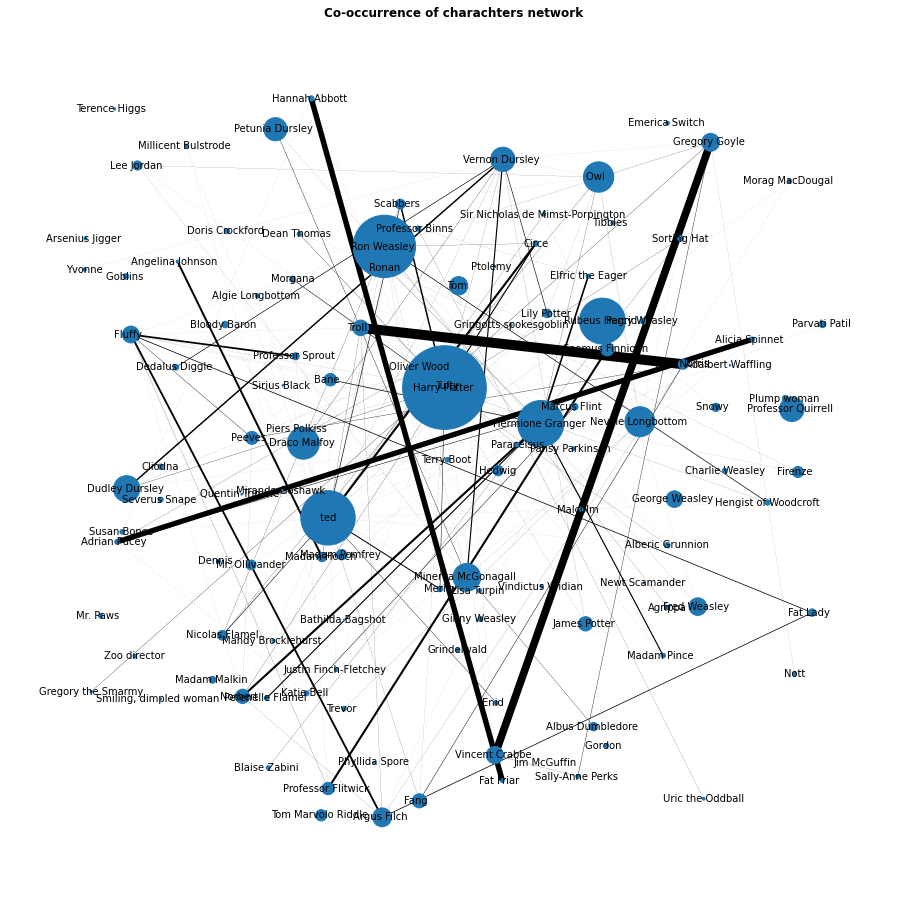

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=(16,16))
max=column_sums.max()
min=column_sums.min()
param=7000
sizes = [(param*(x-min)/(max-min)) for x in column_sums]
max_=adj_matrix.max()
min_=adj_matrix.min()
param2=10
widths = [param2*(w-min_)/(max_-min_) for w in adj_matrix.flatten()]
pos = nx.spring_layout(G, k=0.80, iterations=1)
nx.draw(G,pos, node_size=sizes,with_labels=True,font_size=10,width=widths)
plt.title("Co-occurrence of charachters network",fontweight="bold")
plt.show()
plt.savefig("sl_network2.png") # save as png


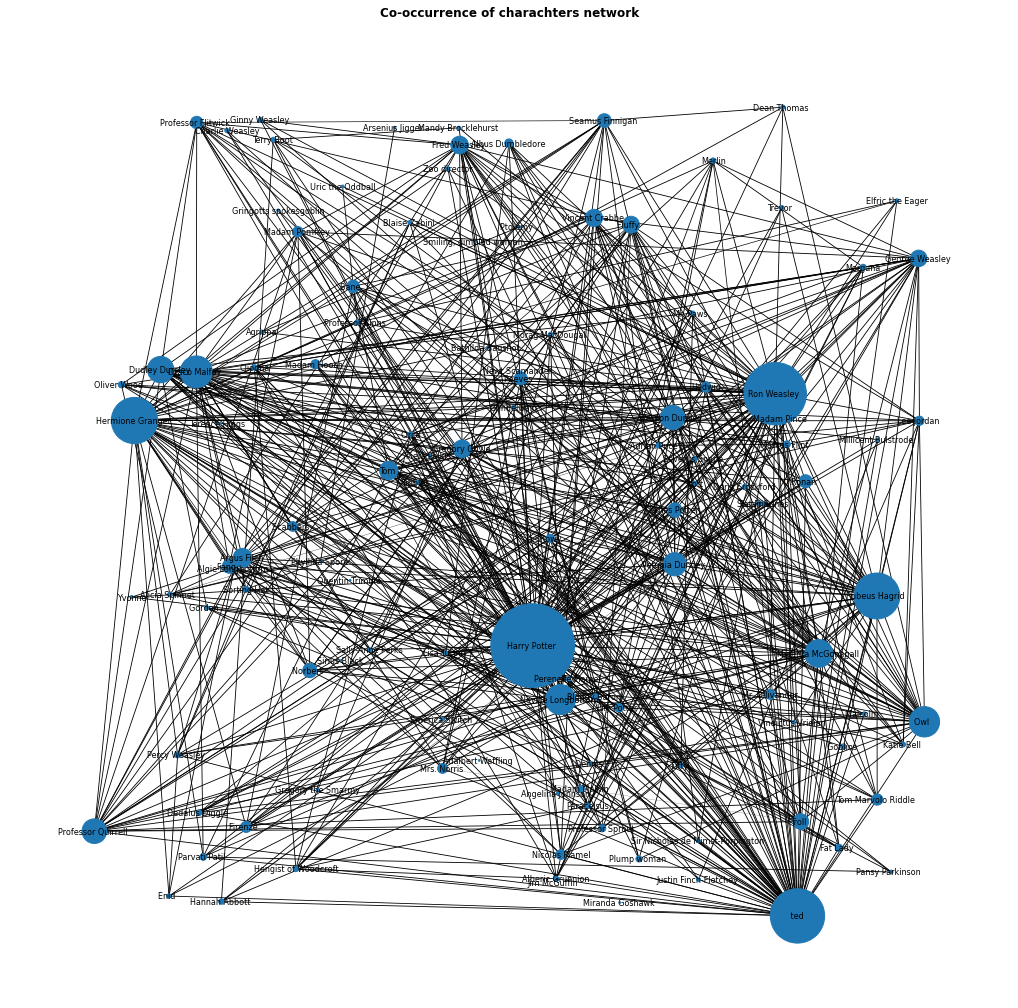

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=(18,18))
max=column_sums.max()
min=column_sums.min()
param=7000
sizes = [(param*(x-min)/(max-min)) for x in column_sums]
max_=adj_matrix.max()
min_=adj_matrix.min()
widths = [(w-500)/(max_-min_) for w in adj_matrix.flatten()]
#pos = nx.spring_layout(G, k=0.90, iterations=1)
pos= nx.random_layout(G)
nx.draw(G,pos, node_size=sizes,with_labels=True,font_size=8,width=widths)
plt.title("Co-occurrence of charachters network",fontweight="bold")
plt.show()
plt.savefig("sl_network2.png") # save as png


## **save network**

In [ ]:
df=pd.DataFrame(adj_matrix,columns=characters_final)

In [ ]:
df

,Vernon Dursley,Petunia Dursley,Dudley Dursley,Lily Potter,James Potter,Harry Potter,Minerva McGonagall,ted,Jim McGuffin,Albus Dumbledore,Dedalus Diggle,Tom Marvolo Riddle,Madam Pomfrey,Rubeus Hagrid,Sirius Black,Tibbles,Snowy,Mr. Paws,Tufty,Yvonne,Piers Polkiss,Zoo director,Dennis,Malcolm,Gordon,Owl,Miranda Goshawk,Bathilda Bagshot,Adalbert Waffling,Emerica Switch,Phyllida Spore,Arsenius Jigger,Newt Scamander,Quentin Trimble,Tom,Doris Crockford,Professor Quirrell,Plump woman,Goblins,Madam Malkin,...,Morag MacDougal,Nott,Pansy Parkinson,Parvati Patil,Sally-Anne Perks,Dean Thomas,Lisa Turpin,Blaise Zabini,Bloody Baron,Algie Longbottom,Enid,Severus Snape,Argus Filch,Madam Hooch,Peeves,Fat Lady,Mrs. Norris,Professor Sprout,Professor Binns,Uric the Oddball,Professor Flitwick,Fang,Gringotts spokesgoblin,Oliver Wood,Gregory the Smarmy,Fluffy,Troll,Angelina Johnson,Alicia Spinnet,Marcus Flint,Katie Bell,Adrian Pucey,Terence Higgs,Madam Pince,Perenelle Flamel,Norbert,Ronan,Bane,Firenze,Elfric the Eager
0,0,88,36,6,8,68,6,38,0,0,2,2,0,14,0,0,0,0,0,2,0,0,0,0,0,22,0,0,0,0,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88,0,32,6,8,66,8,28,0,0,2,0,0,12,0,0,0,0,0,2,0,0,0,0,0,16,0,0,0,0,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36,32,0,2,2,126,0,60,0,0,0,0,0,10,0,2,2,2,2,0,2,2,2,2,2,22,0,0,0,0,0,0,0,0,8,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,6,2,0,12,12,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,8,2,12,0,40,2,10,0,2,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0,0,0,0,22,4,10,0,0,0,0,4,16,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,0,0,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,10,0,4,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,6,0
116,0,0,0,0,0,22,0,2,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,12,0,12,0
117,0,0,0,0,2,22,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,6,12,0,0


In [ ]:
characters=df.columns.values.tolist()
characters=characters[1:]

In [ ]:
df.to_csv("adjacency_matrix.csv")

In [ ]:
characters

['Petunia Dursley ',
 'Dudley Dursley ',
 'Lily Potter ',
 'James Potter ',
 'Harry Potter ',
 'Minerva McGonagall ',
 ' ted ',
 'Jim McGuffin ',
 'Albus Dumbledore ',
 'Dedalus Diggle ',
 'Tom Marvolo Riddle ',
 'Madam Pomfrey ',
 'Rubeus Hagrid ',
 'Sirius Black ',
 'Tibbles  ',
 'Snowy  ',
 'Mr. Paws  ',
 'Tufty  ',
 'Yvonne',
 'Piers Polkiss',
 'Zoo director',
 'Dennis  ',
 'Malcolm  ',
 'Gordon  ',
 'Owl  ',
 'Miranda Goshawk ',
 'Bathilda Bagshot ',
 'Adalbert Waffling ',
 'Emerica Switch ',
 'Phyllida Spore ',
 'Arsenius Jigger ',
 'Newt Scamander ',
 'Quentin Trimble ',
 'Tom ',
 'Doris Crockford ',
 'Professor Quirrell ',
 'Plump woman ',
 'Goblins ',
 'Madam Malkin ',
 'Draco Malfoy ',
 'Vindictus Vridian ',
 'Hedwig',
 'Mr. Ollivander',
 'Ginny Weasley ',
 'Percy Weasley ',
 'Fred Weasley ',
 'George Weasley ',
 'Ron Weasley ',
 'Trevor  ',
 'Neville Longbottom ',
 'Lee Jordan ',
 'Charlie Weasley',
 'Scabbers  ',
 'Smiling, dimpled woman  ',
 'Agrippa',
 'Ptolemy  ',
 'Grin

In [ ]:
generate_relations_file=""
cpt=0
for i in range(len(characters)):
  for j in range(len(characters)):
    if(adj_matrix[i,j]>0):
      cpt=cpt+1
      generate_relations_file=generate_relations_file+f"\n {characters[i]},{characters[j]}"

## **5- Greedy algorithm for Influence Maximization Problem**

In [ ]:
def get_matrix_from_csv(path): # ++
    df=pd.read_csv(path)
    characters=df.columns.values.tolist()
    df=df.iloc[:,1:]
    adj_matrix=df.to_numpy()
    return adj_matrix,characters

def vertices(G): # ++
    #number of lines = number of nodes
    return [i for i in range(119)]

In [ ]:
def generate_X(G): # ++
    print("generate large number of realisations X of the ICM on G")
    nb_edges=len(G.flatten())
    k_realisations=100 #Hyper parameter: number of simulations of the ICM
    X=[]
    Px=np.random.dirichlet(np.ones(k_realisations),size=1)  #random distriction of P(X)
    for i in range(k_realisations):
        rand=np.random.dirichlet(np.ones(nb_edges),size=1) #create a proba distribution over edges
        X.append(rand[0]) #add the realisation to the list of ICM simulations
    print(X[0])
    return Px[0],X

In [ ]:
def best_node(G,A,V,X_list,Px):
    print("find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})")
    V_list=list(set(V)-set(A)) #element remaining
    results=0
    max=0
    for v in V_list: #for remaining vertices in V - A
        sum = 0
        for i,x in enumerate(X_list): # sum over all realisations X
            p=Px[i] #retrive probability P(Xi)
            sum=sum + ( p* influence_x(G,A,x,v)) #compute value
        if sum>results:
            results=sum
            max=v

    return max #return the best


In [ ]:
def influence_x(G,A,x,v=None): # the influence of A unfer realization X
    temp_A=A.copy()
    if(v != None):
        temp_A.append(v)
    G=ICM(G,x) #activate and desactivate edges according to flip coin event
    nb_active=0
    for node in temp_A:
        nb_active=nb_active+ (G.sum(axis=0))[node]  #number of vertices reached by "node" through an active edge
    return nb_active

In [ ]:
def ICM(G,x): #percolation of the graph based on X realisation
    icm=G.copy()
    cpt=0
    for i in range(119):
        for j in range(119):
            cpt=cpt+1
            if(np.random.random() >x[cpt-1]): 
                icm[i,j]=1
            else:
                icm[i,j]=0
    
    return icm

In [ ]:
def greedy_hill_climbing(G): #apply greedy algorithm on a graph G with set size k
    k=6 #5% of nodes
    Px,X_list = generate_X(G)

    V=vertices(G) #V holds the vertices of the graph
    A=[]
    for i in range(k):
        v= best_node(G,A,V,X_list,Px)
        A.append(v)
        print(f"A gets node {v}")

    return A


In [ ]:
#apply greedy hill climbing on inferred network
G_,characters= get_matrix_from_csv('/content/adjacency_matrix.csv')
A=greedy_hill_climbing(G_)


generate large number of realisations X of the ICM on G
[2.98518372e-05 1.78936457e-05 2.78676340e-05 ... 4.51488785e-05
 3.05060578e-05 1.07773766e-04]
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 1
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 2
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 7
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 11
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 24
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 13


In [ ]:
print("Initial set of high influence:")
for i in A:
  print(characters[i+1])

Initial set of high influence:
Petunia Dursley 
Dudley Dursley 
 ted 
Tom Marvolo Riddle 
Gordon  
Rubeus Hagrid 


In [ ]:
Px, X_list = generate_X(G_)
icm=ICM(G_,X_list[6])

generate large number of realisations X of the ICM on G
[4.36894860e-05 1.44077002e-04 7.34253679e-05 ... 2.12523344e-04
 2.38396788e-04 8.57725913e-05]


In [ ]:
print(type(icm))

<class 'numpy.ndarray'>
